In [1]:
#HALF WED, HALF FRI

#TODO: Include weather data in dataset
#TODO: Add custom callbacks (Model Checkpoint and Early Stopping and learning rate)
#TODO: Check current model hyperparams (Gridsearch-like process)

#Plot prediction !!!!!!!!!!! (true vs test + train) (HYBRID+SVR)
#weather points -> TURBIDITY -> fine tune model

#TRAINING MAE 

#Phil sent script for solar enegrgy


#SCALE HYBRID DATA

#Don't put day into traning
#Cehck for outliers in weather
#Read how much past data affects cellcount/turbidity (suggest-lag of 6 (1hr 30 mins))


#__________________________________________

#plot train + test together time order
#add cross validation k fold (5 folds)
#RMSE metric
#SAVE RESULTS OF PREDICTION



#set out setions in final report

#save graphs (do weather test and no weather test) EMAIL PPT TO MAIRA AND RACHEL AND PRINT

In [2]:
import numpy as np
import pandas as pd
import os
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split, KFold
from sklearn.metrics import mean_squared_error


import tensorflow.keras as keras


In [3]:
df = pd.read_csv(os.path.join("data", "final_df.csv"))

In [4]:
df['Date 2'] = pd.to_datetime(df['Date 2']) 
df['Day'] = (df['Date 2'] - df['Date 2'].min())  / np.timedelta64(1,'D')
df_no_date = df.drop(columns=['Date 1', 'Date 2', 'Date'])

x_arr = np.array(df_no_date.drop(columns=['cell count']), np.float32)
x_shaped = x_arr.reshape(x_arr.shape[0], 1, x_arr.shape[1])

y_shaped = df_no_date['cell count'].values

kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(x_shaped)

print(kf)


KFold(n_splits=5, random_state=None, shuffle=True)


In [5]:
model = keras.models.Sequential([
    keras.layers.GRU(100, return_sequences=True, input_shape=[None, x_shaped.shape[2]]),
    keras.layers.GRU(144, return_sequences=True, activation='relu'),
    keras.layers.Reshape(target_shape=(12,12)),
    keras.layers.Conv1D(filters=128, kernel_size=4, strides=1, padding='same',activation='relu'),
    keras.layers.Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),
    keras.layers.MaxPooling1D((2), strides=None),
    keras.layers.AveragePooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(8, ),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 100)         35700     
                                                                 
 gru_1 (GRU)                 (None, None, 144)         106272    
                                                                 
 reshape (Reshape)           (None, 12, 12)            0         
                                                                 
 conv1d (Conv1D)             (None, 12, 128)           6272      
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 64)            32832     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 64)            0         
 )                                                               
                                                        

In [6]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.00010),  
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()]
        )

In [7]:
models = []
histories = []  
model_evals = []
for train_index, test_index in kf.split(x_shaped):
    x_train, x_test = x_shaped[train_index], x_shaped[test_index]
    y_train, y_test = y_shaped[train_index], y_shaped[test_index]

    history = model.fit(x_train,y_train,epochs=200)
    
    model_eval = model.evaluate(x_test, y_test)
    models.append(model)
    histories.append(history)
    model_evals.append(model_eval)
        

Epoch 1/200
4/4 [==============================] - 3s 5ms/step - loss: 11331.4248 - root_mean_squared_error: 106.4492
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 11301.4707 - root_mean_squared_error: 106.3084
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 11277.1865 - root_mean_squared_error: 106.1941
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 11252.4033 - root_mean_squared_error: 106.0773
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 11226.0049 - root_mean_squared_error: 105.9528
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 11198.3105 - root_mean_squared_error: 105.8221
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 11167.8848 - root_mean_squared_error: 105.6782
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 11133.9053 - root_mean_squared_error: 105.5173
Epoch 9/200
4/4 [==============================] - 0s 5m

4/4 [==============================] - 0s 4ms/step - loss: 1533.9464 - root_mean_squared_error: 39.1656
Epoch 71/200
4/4 [==============================] - 0s 5ms/step - loss: 1511.1364 - root_mean_squared_error: 38.8733
Epoch 72/200
4/4 [==============================] - 0s 4ms/step - loss: 1495.3481 - root_mean_squared_error: 38.6697
Epoch 73/200
4/4 [==============================] - 0s 4ms/step - loss: 1490.4792 - root_mean_squared_error: 38.6067
Epoch 74/200
4/4 [==============================] - 0s 5ms/step - loss: 1480.9679 - root_mean_squared_error: 38.4833
Epoch 75/200
4/4 [==============================] - 0s 4ms/step - loss: 1475.1445 - root_mean_squared_error: 38.4076
Epoch 76/200
4/4 [==============================] - 0s 5ms/step - loss: 1464.8883 - root_mean_squared_error: 38.2739
Epoch 77/200
4/4 [==============================] - 0s 5ms/step - loss: 1455.1941 - root_mean_squared_error: 38.1470
Epoch 78/200
4/4 [==============================] - 0s 4ms/step - loss: 1451.

4/4 [==============================] - 0s 4ms/step - loss: 1014.3214 - root_mean_squared_error: 31.8484
Epoch 140/200
4/4 [==============================] - 0s 5ms/step - loss: 1006.7181 - root_mean_squared_error: 31.7288
Epoch 141/200
4/4 [==============================] - 0s 4ms/step - loss: 993.2122 - root_mean_squared_error: 31.5153
Epoch 142/200
4/4 [==============================] - 0s 4ms/step - loss: 993.3251 - root_mean_squared_error: 31.5171
Epoch 143/200
4/4 [==============================] - 0s 4ms/step - loss: 981.3004 - root_mean_squared_error: 31.3257
Epoch 144/200
4/4 [==============================] - 0s 4ms/step - loss: 983.2590 - root_mean_squared_error: 31.3570
Epoch 145/200
4/4 [==============================] - 0s 5ms/step - loss: 972.8489 - root_mean_squared_error: 31.1905
Epoch 146/200
4/4 [==============================] - 0s 5ms/step - loss: 968.2889 - root_mean_squared_error: 31.1173
Epoch 147/200
4/4 [==============================] - 0s 4ms/step - loss: 964

4/4 [==============================] - 0s 5ms/step - loss: 570.9238 - root_mean_squared_error: 23.8940
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 551.0994 - root_mean_squared_error: 23.4755
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 540.5871 - root_mean_squared_error: 23.2505
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 543.0340 - root_mean_squared_error: 23.3031
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 529.6066 - root_mean_squared_error: 23.0132
Epoch 13/200
4/4 [==============================] - 0s 4ms/step - loss: 537.7015 - root_mean_squared_error: 23.1884
Epoch 14/200
4/4 [==============================] - 0s 5ms/step - loss: 520.1503 - root_mean_squared_error: 22.8068
Epoch 15/200
4/4 [==============================] - 0s 5ms/step - loss: 521.1724 - root_mean_squared_error: 22.8292
Epoch 16/200
4/4 [==============================] - 0s 5ms/step - loss: 513.4406 - roo

4/4 [==============================] - 0s 5ms/step - loss: 374.1432 - root_mean_squared_error: 19.3428
Epoch 79/200
4/4 [==============================] - 0s 5ms/step - loss: 368.7078 - root_mean_squared_error: 19.2018
Epoch 80/200
4/4 [==============================] - 0s 5ms/step - loss: 376.7267 - root_mean_squared_error: 19.4094
Epoch 81/200
4/4 [==============================] - 0s 5ms/step - loss: 364.4781 - root_mean_squared_error: 19.0913
Epoch 82/200
4/4 [==============================] - 0s 4ms/step - loss: 366.5933 - root_mean_squared_error: 19.1466
Epoch 83/200
4/4 [==============================] - 0s 5ms/step - loss: 364.3878 - root_mean_squared_error: 19.0889
Epoch 84/200
4/4 [==============================] - 0s 5ms/step - loss: 372.0798 - root_mean_squared_error: 19.2894
Epoch 85/200
4/4 [==============================] - 0s 5ms/step - loss: 362.2887 - root_mean_squared_error: 19.0339
Epoch 86/200
4/4 [==============================] - 0s 5ms/step - loss: 367.4085 - ro

4/4 [==============================] - 0s 5ms/step - loss: 326.3677 - root_mean_squared_error: 18.0657
Epoch 149/200
4/4 [==============================] - 0s 8ms/step - loss: 330.8099 - root_mean_squared_error: 18.1882
Epoch 150/200
4/4 [==============================] - 0s 6ms/step - loss: 320.5320 - root_mean_squared_error: 17.9034
Epoch 151/200
4/4 [==============================] - 0s 5ms/step - loss: 323.4938 - root_mean_squared_error: 17.9859
Epoch 152/200
4/4 [==============================] - 0s 6ms/step - loss: 326.4219 - root_mean_squared_error: 18.0672
Epoch 153/200
4/4 [==============================] - 0s 6ms/step - loss: 326.1706 - root_mean_squared_error: 18.0602
Epoch 154/200
4/4 [==============================] - 0s 6ms/step - loss: 320.2573 - root_mean_squared_error: 17.8957
Epoch 155/200
4/4 [==============================] - 0s 5ms/step - loss: 323.3641 - root_mean_squared_error: 17.9823
Epoch 156/200
4/4 [==============================] - 0s 5ms/step - loss: 321.7

4/4 [==============================] - 0s 5ms/step - loss: 372.4055 - root_mean_squared_error: 19.2978
Epoch 18/200
4/4 [==============================] - 0s 5ms/step - loss: 382.5445 - root_mean_squared_error: 19.5587
Epoch 19/200
4/4 [==============================] - 0s 9ms/step - loss: 369.6391 - root_mean_squared_error: 19.2260
Epoch 20/200
4/4 [==============================] - 0s 5ms/step - loss: 390.1355 - root_mean_squared_error: 19.7518
Epoch 21/200
4/4 [==============================] - 0s 5ms/step - loss: 365.7037 - root_mean_squared_error: 19.1234
Epoch 22/200
4/4 [==============================] - 0s 5ms/step - loss: 383.5168 - root_mean_squared_error: 19.5836
Epoch 23/200
4/4 [==============================] - 0s 5ms/step - loss: 366.7148 - root_mean_squared_error: 19.1498
Epoch 24/200
4/4 [==============================] - 0s 6ms/step - loss: 374.3201 - root_mean_squared_error: 19.3474
Epoch 25/200
4/4 [==============================] - 0s 6ms/step - loss: 368.4850 - ro

4/4 [==============================] - 0s 5ms/step - loss: 332.3329 - root_mean_squared_error: 18.2300
Epoch 88/200
4/4 [==============================] - 0s 4ms/step - loss: 331.8129 - root_mean_squared_error: 18.2157
Epoch 89/200
4/4 [==============================] - 0s 4ms/step - loss: 325.0899 - root_mean_squared_error: 18.0302
Epoch 90/200
4/4 [==============================] - 0s 5ms/step - loss: 328.8948 - root_mean_squared_error: 18.1355
Epoch 91/200
4/4 [==============================] - 0s 5ms/step - loss: 325.2897 - root_mean_squared_error: 18.0358
Epoch 92/200
4/4 [==============================] - 0s 5ms/step - loss: 327.6847 - root_mean_squared_error: 18.1021
Epoch 93/200
4/4 [==============================] - 0s 5ms/step - loss: 333.6484 - root_mean_squared_error: 18.2660
Epoch 94/200
4/4 [==============================] - 0s 5ms/step - loss: 328.5141 - root_mean_squared_error: 18.1250
Epoch 95/200
4/4 [==============================] - 0s 5ms/step - loss: 325.8120 - ro

4/4 [==============================] - 0s 5ms/step - loss: 297.0456 - root_mean_squared_error: 17.2350
Epoch 158/200
4/4 [==============================] - 0s 5ms/step - loss: 298.0549 - root_mean_squared_error: 17.2643
Epoch 159/200
4/4 [==============================] - 0s 4ms/step - loss: 299.9305 - root_mean_squared_error: 17.3185
Epoch 160/200
4/4 [==============================] - 0s 5ms/step - loss: 302.8622 - root_mean_squared_error: 17.4029
Epoch 161/200
4/4 [==============================] - 0s 5ms/step - loss: 296.2185 - root_mean_squared_error: 17.2110
Epoch 162/200
4/4 [==============================] - 0s 5ms/step - loss: 294.9145 - root_mean_squared_error: 17.1731
Epoch 163/200
4/4 [==============================] - 0s 4ms/step - loss: 296.5522 - root_mean_squared_error: 17.2207
Epoch 164/200
4/4 [==============================] - 0s 4ms/step - loss: 297.5890 - root_mean_squared_error: 17.2508
Epoch 165/200
4/4 [==============================] - 0s 5ms/step - loss: 300.8

4/4 [==============================] - 0s 5ms/step - loss: 307.7452 - root_mean_squared_error: 17.5427
Epoch 27/200
4/4 [==============================] - 0s 4ms/step - loss: 298.9951 - root_mean_squared_error: 17.2915
Epoch 28/200
4/4 [==============================] - 0s 5ms/step - loss: 297.8445 - root_mean_squared_error: 17.2582
Epoch 29/200
4/4 [==============================] - 0s 5ms/step - loss: 313.5797 - root_mean_squared_error: 17.7082
Epoch 30/200
4/4 [==============================] - 0s 5ms/step - loss: 300.4182 - root_mean_squared_error: 17.3326
Epoch 31/200
4/4 [==============================] - 0s 4ms/step - loss: 299.0990 - root_mean_squared_error: 17.2945
Epoch 32/200
4/4 [==============================] - 0s 5ms/step - loss: 298.1278 - root_mean_squared_error: 17.2664
Epoch 33/200
4/4 [==============================] - 0s 5ms/step - loss: 306.3618 - root_mean_squared_error: 17.5032
Epoch 34/200
4/4 [==============================] - 0s 5ms/step - loss: 307.0054 - ro

4/4 [==============================] - 0s 4ms/step - loss: 271.0853 - root_mean_squared_error: 16.4647
Epoch 97/200
4/4 [==============================] - 0s 4ms/step - loss: 272.8623 - root_mean_squared_error: 16.5185
Epoch 98/200
4/4 [==============================] - 0s 5ms/step - loss: 270.4054 - root_mean_squared_error: 16.4440
Epoch 99/200
4/4 [==============================] - 0s 5ms/step - loss: 281.5913 - root_mean_squared_error: 16.7807
Epoch 100/200
4/4 [==============================] - 0s 4ms/step - loss: 276.8166 - root_mean_squared_error: 16.6378
Epoch 101/200
4/4 [==============================] - 0s 5ms/step - loss: 267.6343 - root_mean_squared_error: 16.3595
Epoch 102/200
4/4 [==============================] - 0s 5ms/step - loss: 268.1037 - root_mean_squared_error: 16.3739
Epoch 103/200
4/4 [==============================] - 0s 5ms/step - loss: 278.6313 - root_mean_squared_error: 16.6923
Epoch 104/200
4/4 [==============================] - 0s 4ms/step - loss: 275.8288

4/4 [==============================] - 0s 4ms/step - loss: 246.8049 - root_mean_squared_error: 15.7100
Epoch 167/200
4/4 [==============================] - 0s 5ms/step - loss: 249.8638 - root_mean_squared_error: 15.8071
Epoch 168/200
4/4 [==============================] - 0s 5ms/step - loss: 241.6230 - root_mean_squared_error: 15.5442
Epoch 169/200
4/4 [==============================] - 0s 4ms/step - loss: 243.5334 - root_mean_squared_error: 15.6056
Epoch 170/200
4/4 [==============================] - 0s 4ms/step - loss: 256.8759 - root_mean_squared_error: 16.0273
Epoch 171/200
4/4 [==============================] - 0s 4ms/step - loss: 242.6958 - root_mean_squared_error: 15.5787
Epoch 172/200
4/4 [==============================] - 0s 5ms/step - loss: 240.7641 - root_mean_squared_error: 15.5166
Epoch 173/200
4/4 [==============================] - 0s 5ms/step - loss: 240.6795 - root_mean_squared_error: 15.5138
Epoch 174/200
4/4 [==============================] - 0s 5ms/step - loss: 241.6

4/4 [==============================] - 0s 5ms/step - loss: 171.1037 - root_mean_squared_error: 13.0807
Epoch 36/200
4/4 [==============================] - 0s 5ms/step - loss: 166.1057 - root_mean_squared_error: 12.8882
Epoch 37/200
4/4 [==============================] - 0s 4ms/step - loss: 169.6707 - root_mean_squared_error: 13.0258
Epoch 38/200
4/4 [==============================] - 0s 5ms/step - loss: 169.5468 - root_mean_squared_error: 13.0210
Epoch 39/200
4/4 [==============================] - 0s 6ms/step - loss: 178.4779 - root_mean_squared_error: 13.3596
Epoch 40/200
4/4 [==============================] - 0s 4ms/step - loss: 164.5372 - root_mean_squared_error: 12.8272
Epoch 41/200
4/4 [==============================] - 0s 5ms/step - loss: 176.1174 - root_mean_squared_error: 13.2709
Epoch 42/200
4/4 [==============================] - 0s 5ms/step - loss: 166.4048 - root_mean_squared_error: 12.8998
Epoch 43/200
4/4 [==============================] - 0s 5ms/step - loss: 166.8461 - ro

4/4 [==============================] - 0s 5ms/step - loss: 156.3168 - root_mean_squared_error: 12.5027
Epoch 106/200
4/4 [==============================] - 0s 5ms/step - loss: 155.8954 - root_mean_squared_error: 12.4858
Epoch 107/200
4/4 [==============================] - 0s 5ms/step - loss: 160.4472 - root_mean_squared_error: 12.6668
Epoch 108/200
4/4 [==============================] - 0s 5ms/step - loss: 160.5473 - root_mean_squared_error: 12.6707
Epoch 109/200
4/4 [==============================] - 0s 5ms/step - loss: 155.8469 - root_mean_squared_error: 12.4839
Epoch 110/200
4/4 [==============================] - 0s 5ms/step - loss: 160.6660 - root_mean_squared_error: 12.6754
Epoch 111/200
4/4 [==============================] - 0s 5ms/step - loss: 156.8993 - root_mean_squared_error: 12.5259
Epoch 112/200
4/4 [==============================] - 0s 5ms/step - loss: 157.7033 - root_mean_squared_error: 12.5580
Epoch 113/200
4/4 [==============================] - 0s 4ms/step - loss: 158.8

4/4 [==============================] - 0s 5ms/step - loss: 147.4661 - root_mean_squared_error: 12.1436
Epoch 176/200
4/4 [==============================] - 0s 5ms/step - loss: 154.4907 - root_mean_squared_error: 12.4294
Epoch 177/200
4/4 [==============================] - 0s 5ms/step - loss: 149.6360 - root_mean_squared_error: 12.2326
Epoch 178/200
4/4 [==============================] - 0s 5ms/step - loss: 147.0467 - root_mean_squared_error: 12.1263
Epoch 179/200
4/4 [==============================] - 0s 5ms/step - loss: 150.5386 - root_mean_squared_error: 12.2694
Epoch 180/200
4/4 [==============================] - 0s 5ms/step - loss: 155.5638 - root_mean_squared_error: 12.4725
Epoch 181/200
4/4 [==============================] - 0s 4ms/step - loss: 149.4676 - root_mean_squared_error: 12.2257
Epoch 182/200
4/4 [==============================] - 0s 4ms/step - loss: 147.0629 - root_mean_squared_error: 12.1270
Epoch 183/200
4/4 [==============================] - 0s 4ms/step - loss: 148.6

In [8]:
#check which is best
model_evals

[[638.2901000976562, 25.264404296875],
 [606.9448852539062, 24.63625144958496],
 [347.3929138183594, 18.638479232788086],
 [276.2051086425781, 16.61941909790039],
 [550.2916870117188, 23.458295822143555]]

In [9]:
best_loc = model_evals.index(min(model_evals))
best_model = models[best_loc]
best_history = histories[best_loc]
best_eval = model_evals[best_loc]

In [10]:
best_history.history.keys()

dict_keys(['loss', 'root_mean_squared_error'])

In [11]:

test_loss = best_eval[0]
test_rmse = best_eval[1]

now = dt.datetime.now().strftime("%Y-%m-%d %H-%M")

In [12]:
def check_file(fpath):
    return os.path.exists(fpath)

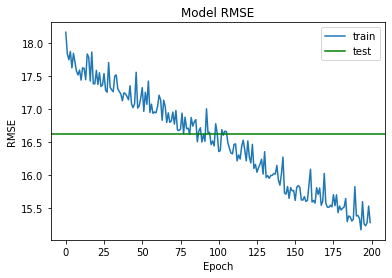

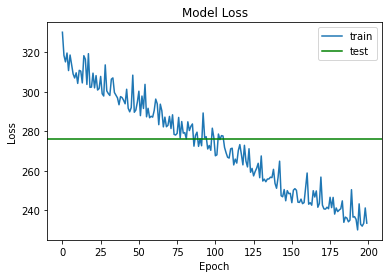

In [13]:
plt.plot(best_history.history['root_mean_squared_error'], label='train')
plt.axhline(test_rmse, color='g', label='test')
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model RMSE vs Epoch" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

plt.plot(best_history.history['loss'], label='train')
plt.axhline(test_loss, color='g', label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model Loss vs Epoch" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

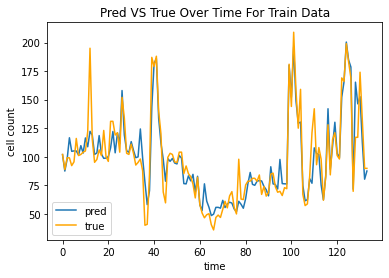

In [14]:
pred = best_model.predict(x_shaped)

plt.plot(pred, label='pred')
plt.plot(y_shaped, color='orange', label='true')
plt.title('Pred VS True Over Time For Train Data')
plt.ylabel('cell count')
plt.xlabel('time')
plt.legend()
fpath = os.path.join("plots", now + " Overall Acc Predicted and True vs Time" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()


In [16]:
df_no_date['cell count'].min()


35.9

In [17]:
df_no_date['cell count']

0      102.0
1       88.8
2       99.1
3       99.0
4       92.2
       ...  
129    117.0
130    174.0
131    132.0
132     89.8
133     89.8
Name: cell count, Length: 134, dtype: float64

In [20]:
df_no_date['cell count'].mean()

97.91567164179105